In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set a professional plot style
sns.set_style('whitegrid')
plt.rc('figure', figsize=(12, 6))

In [5]:
# Define the path to the processed data
processed_data_path = '../data/processed/master_india_properties.csv'

# Load the data, using low_memory=False as it's a large file with mixed types
try:
    df = pd.read_csv(processed_data_path, low_memory=False)
    print(f"Successfully loaded {processed_data_path} with {len(df)} rows.")
except FileNotFoundError:
    print(f"Error: Could not find the master dataset at {processed_data_path}.")
    print("Please run the data creation pipeline first.")
    
# Display basic info
print("\nDataFrame Info:")
df.info()

print("\nFirst 5 Rows:")
df.head()

Successfully loaded ../data/processed/master_india_properties.csv with 383283 rows.

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383283 entries, 0 to 383282
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Price              344697 non-null  float64
 1   Bedrooms           379729 non-null  float64
 2   Bathrooms          23320 non-null   float64
 3   Area_SqFt          345178 non-null  float64
 4   Area_Type          383283 non-null  object 
 5   City               383283 non-null  object 
 6   Locality           382958 non-null  object 
 7   Property_Type      344781 non-null  object 
 8   Furnishing_Status  372327 non-null  object 
 9   Property_Age       322763 non-null  object 
 10  Floor              42285 non-null   float64
 11  Total_Floors       49669 non-null   float64
 12  Longitude          370598 non-null  float64
 13  Latitude           370598 non-null  float64
 14 

,Price,Bedrooms,Bathrooms,Area_SqFt,Area_Type,City,Locality,Property_Type,Furnishing_Status,Property_Age,Floor,Total_Floors,Longitude,Latitude,has_Pool,has_Gym,has_Lift,has_Parking,Source_Dataset
0,3150000.0,1.0,2.0,635.0,Covered Area,Thane,"Kalyan West, Thane",Apartment,Unfurnished,Under Construction,5.0,14.0,NaN,NaN,1,1,1,1,properties
1,6300000.0,2.0,2.0,579.0,Covered Area,Thane,"Kalyan West, Thane",Apartment,Unfurnished,Ready to Move,20.0,34.0,NaN,NaN,1,1,1,1,properties
2,5400000.0,2.0,2.0,850.0,Covered Area,Thane,"Kalyan West, Thane",Apartment,Unfurnished,Ready to Move,18.0,18.0,NaN,NaN,1,1,1,1,properties
3,9000000.0,2.0,2.0,1050.0,Covered Area,Thane,"Kalyan West, Thane",Apartment,Unfurnished,Under Construction,5.0,27.0,NaN,NaN,1,1,1,1,properties
4,4950000.0,1.0,2.0,561.0,Covered Area,Thane,"Kalyan West, Thane",Apartment,Semi-Furnished,Under Construction,8.0,26.0,NaN,NaN,1,1,1,0,properties


In [6]:
# Create a data quality report
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

data_quality_report = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percent': missing_percent
}).sort_values(by='Missing Percent', ascending=False)

# Display the report for columns with at least one missing value
print("Data Quality Report (Columns with Missing Values):")
print(data_quality_report[data_quality_report['Missing Values'] > 0])

Data Quality Report (Columns with Missing Values):
                   Missing Values  Missing Percent
Bathrooms                  359963        93.915723
Floor                      340998        88.967682
Total_Floors               333614        87.041168
Property_Age                60520        15.789899
Price                       38586        10.067235
Property_Type               38502        10.045319
Area_SqFt                   38105         9.941740
Latitude                    12685         3.309565
Longitude                   12685         3.309565
Furnishing_Status           10956         2.858462
Bedrooms                     3554         0.927252
Locality                      325         0.084794


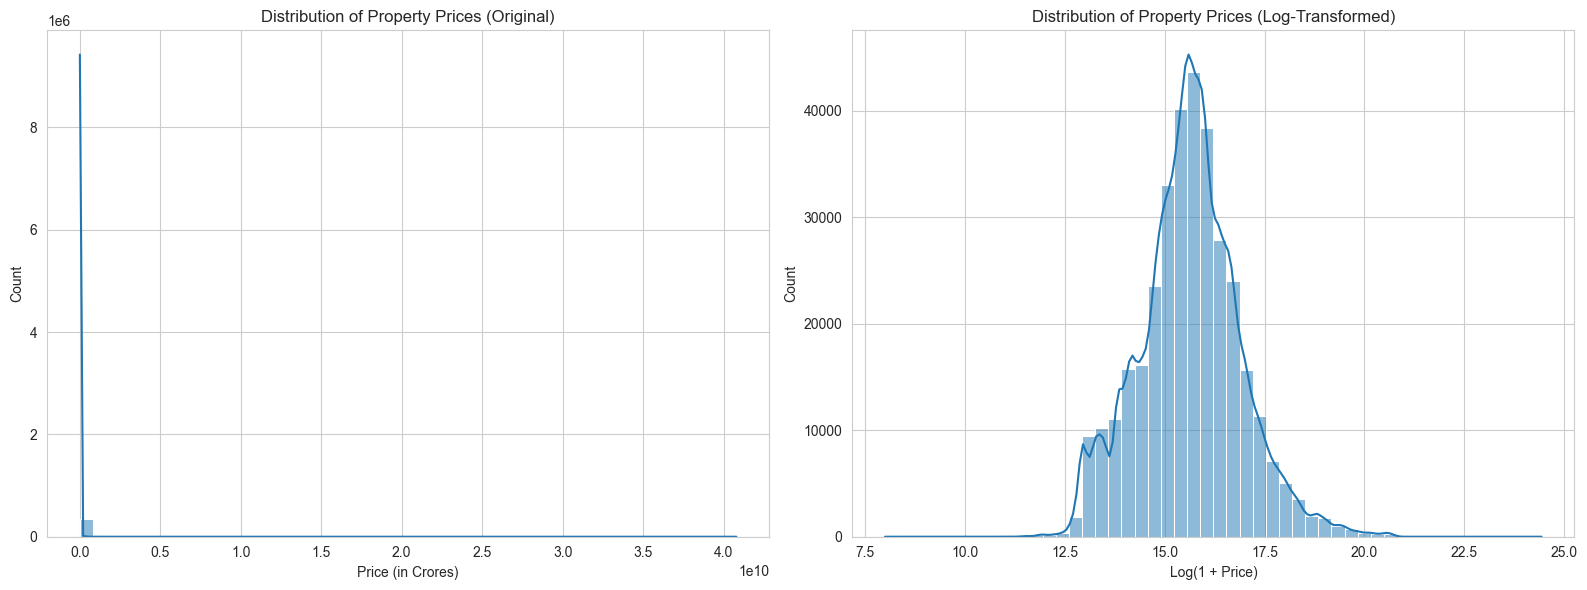

Insight: The original price is heavily skewed. The log-transformed price is much closer to a normal distribution, which is ideal for modeling.


In [ ]:
# Drop rows where price is missing for this analysis
df_price = df.dropna(subset=['Price'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the original price distribution
sns.histplot(df_price['Price'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Property Prices (Original)')
axes[0].set_xlabel('Price (in Crores)')

sns.histplot(np.log1p(df_price['Price']), bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Property Prices (Log-Transformed)')
axes[1].set_xlabel('Log(1 + Price)')

plt.tight_layout()
plt.show()

print("Insight: The original price is heavily skewed. The log-transformed price is much closer to a normal distribution, which is ideal for modeling.")

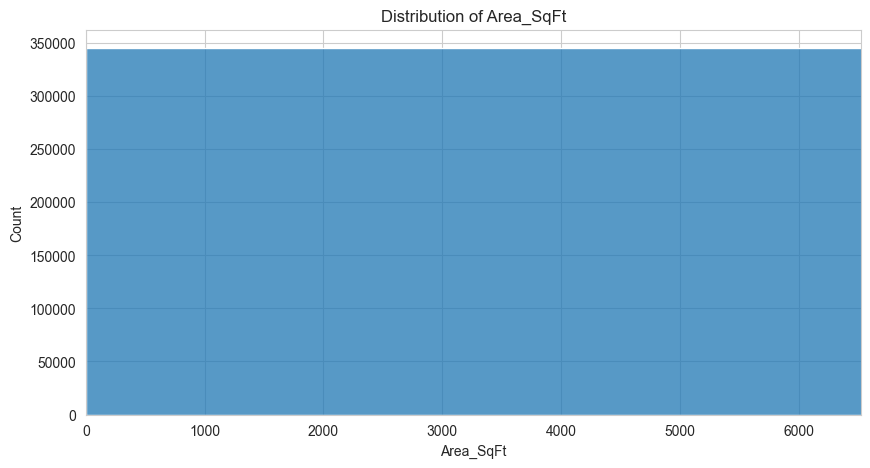

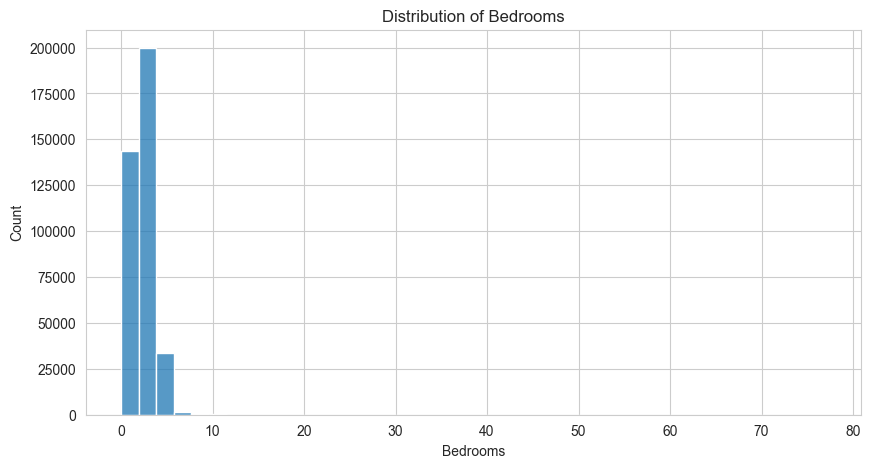

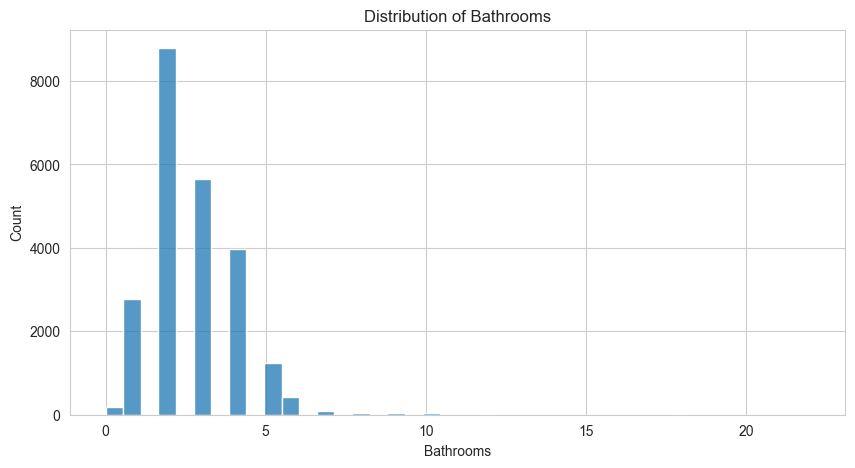

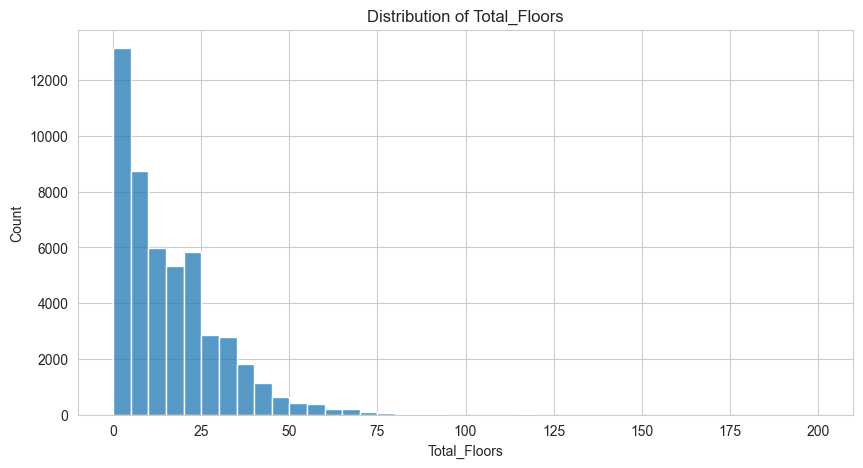

In [8]:
numerical_features = ['Area_SqFt', 'Bedrooms', 'Bathrooms', 'Total_Floors']

# Plot distributions for numerical features
# We cap the quantile at 0.99 to avoid extreme outliers from ruining the plot scale
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col].dropna(), bins=40, kde=False)
    plt.title(f'Distribution of {col}')
    # For Area, limit the x-axis for better readability
    if col == 'Area_SqFt':
        plt.xlim(0, df['Area_SqFt'].quantile(0.99))
    plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_14100\709176998.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


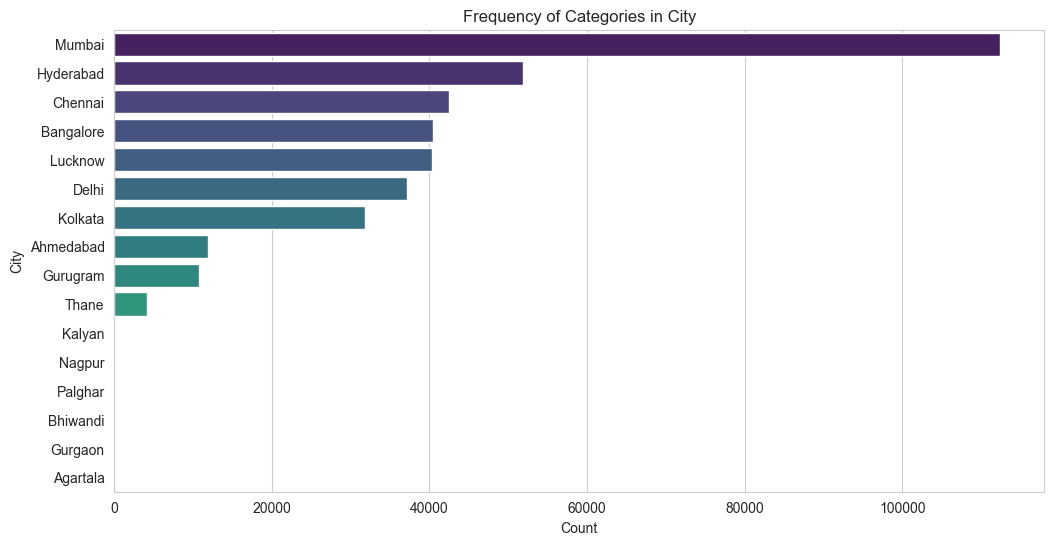

C:\Users\Asus\AppData\Local\Temp\ipykernel_14100\709176998.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


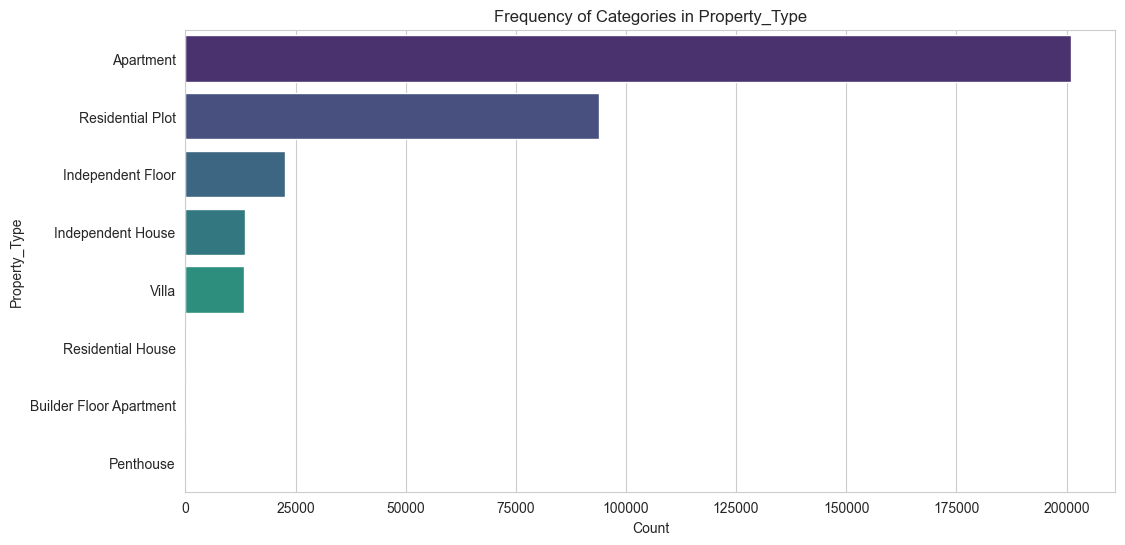

C:\Users\Asus\AppData\Local\Temp\ipykernel_14100\709176998.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


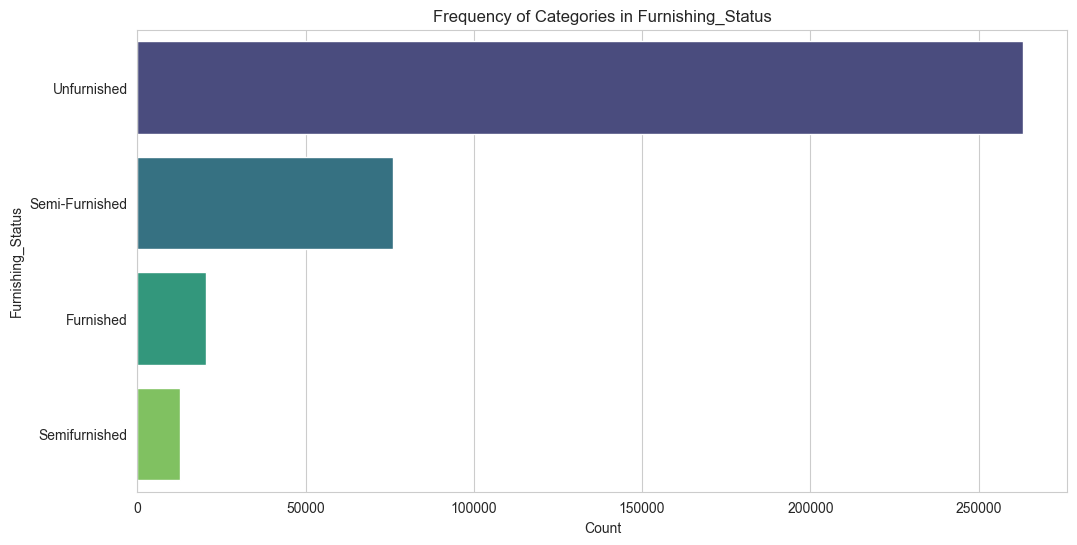

C:\Users\Asus\AppData\Local\Temp\ipykernel_14100\709176998.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


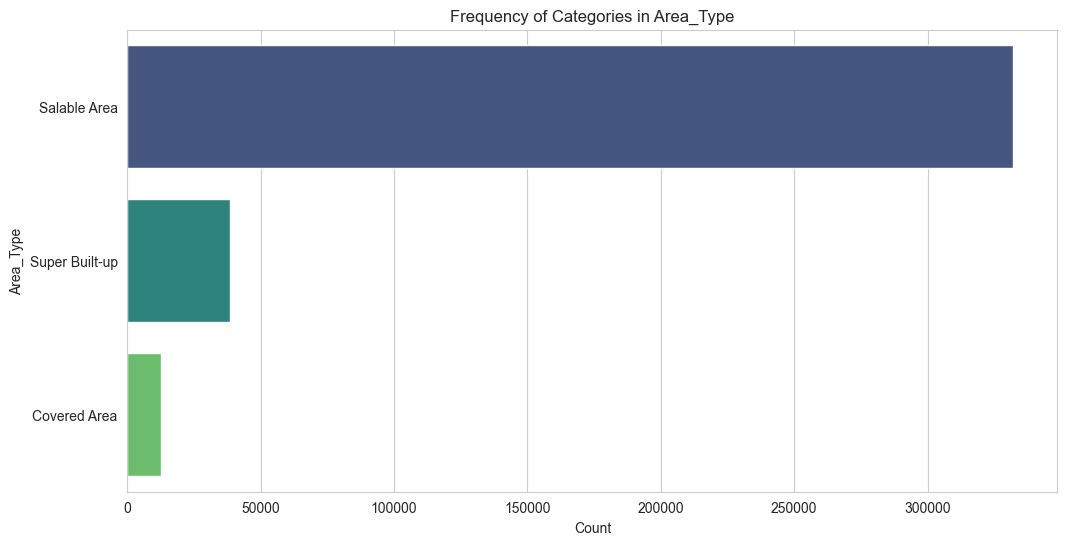


Top 15 Most Common Localities:
Locality
Thane West        10830
Mira Road East    10388
New Town           4446
Sultanpur Road     4388
Dombivali          3491
Kharghar           3302
Rajarhat           2794
Gosainganj         2727
Kalyan West        2501
Kandivali East     2442
Virar              2343
Dwarka Mor         2338
Mirkhanpet         2305
Andheri West       2285
Ulwe               2266
Name: count, dtype: int64


In [9]:
# Plot counts for key categorical features
categorical_features = ['City', 'Property_Type', 'Furnishing_Status', 'Area_Type']

for col in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Frequency of Categories in {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

# For a high-cardinality feature like Locality
print("\nTop 15 Most Common Localities:")
print(df['Locality'].value_counts().head(15))

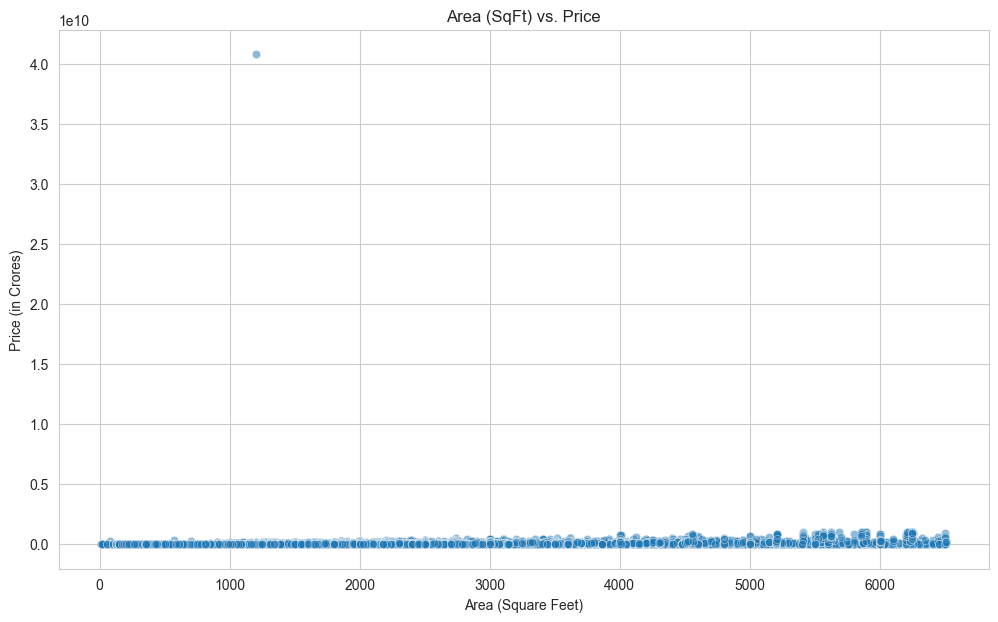

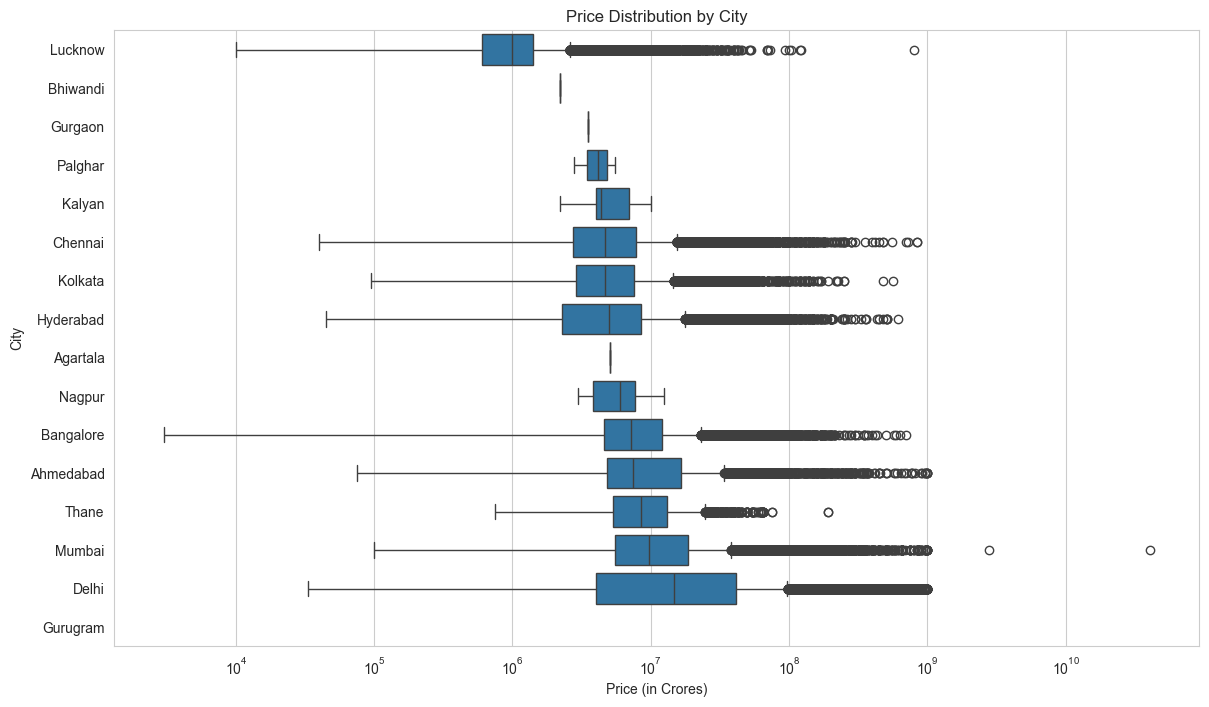

In [10]:
# Area vs. Price
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df[df['Area_SqFt'] < df['Area_SqFt'].quantile(0.99)], # Filter outliers for plot
    x='Area_SqFt', 
    y='Price', 
    alpha=0.5
)
plt.title('Area (SqFt) vs. Price')
plt.xlabel('Area (Square Feet)')
plt.ylabel('Price (in Crores)')
plt.show()

# City vs. Price
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df, 
    x='Price', 
    y='City', 
    orient='h',
    order=df.groupby('City')['Price'].median().sort_values().index # Order cities by median price
)
plt.title('Price Distribution by City')
plt.xlabel('Price (in Crores)')
plt.xscale('log') # Use log scale for price due to skewness
plt.show()

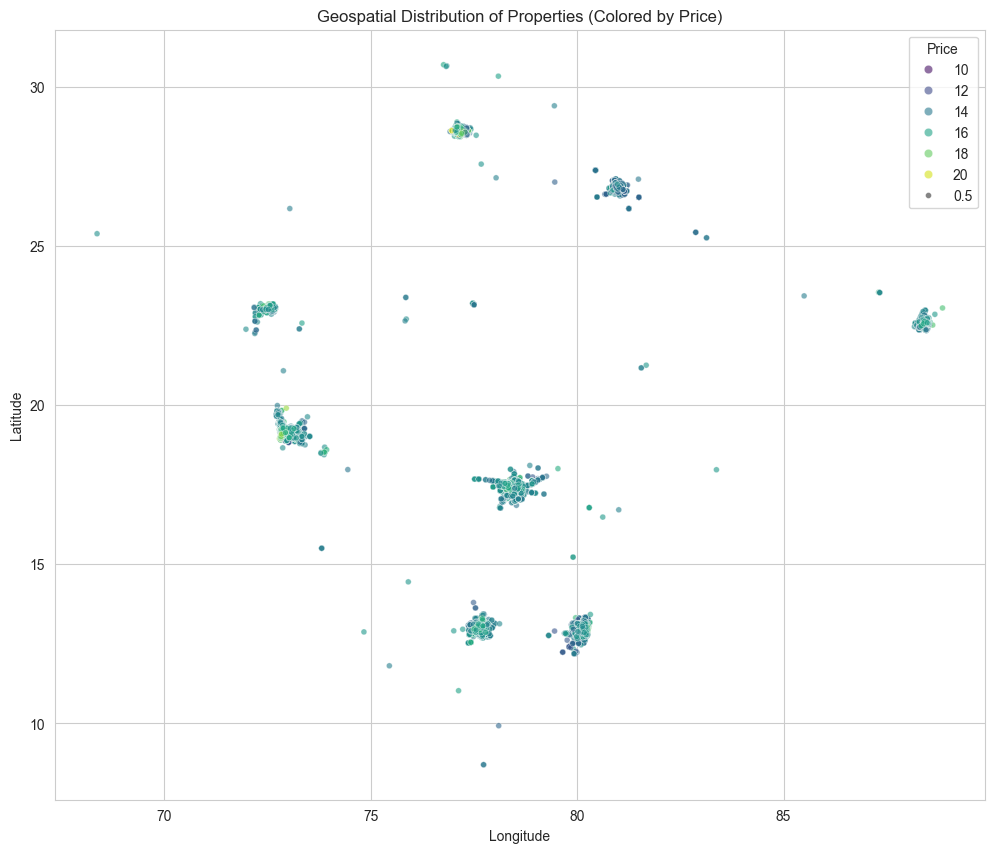

In [11]:
# Sample 50k points to avoid overplotting and slow rendering
df_sample = df.dropna(subset=['Longitude', 'Latitude', 'Price']).sample(n=50000, random_state=42)

plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=df_sample,
    x='Longitude',
    y='Latitude',
    hue=np.log1p(df_sample['Price']), # Color by log price
    palette='viridis',
    size=0.5,
    legend=True,
    alpha=0.6
)
plt.title('Geospatial Distribution of Properties (Colored by Price)')
plt.show()